# **Exploratory Data Analysis(EDA)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Load cleaned data
eda_data_path = "../data/clean"
sales_full = pd.read_csv(os.path.join(eda_data_path, "sales_full.csv"))

# check the structure
sales_full.info()
sales_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order Number     62884 non-null  int64  
 1   Line Item        62884 non-null  int64  
 2   Order Date       62884 non-null  object 
 3   Delivery Date    13165 non-null  object 
 4   CustomerKey      62884 non-null  int64  
 5   StoreKey         62884 non-null  int64  
 6   ProductKey       62884 non-null  int64  
 7   Quantity         62884 non-null  int64  
 8   Currency Code    62884 non-null  object 
 9   DeliveryMissing  62884 non-null  bool   
 10  Gender           62884 non-null  object 
 11  Name             62884 non-null  object 
 12  City             62884 non-null  object 
 13  State Code       62884 non-null  object 
 14  State_x          62884 non-null  object 
 15  Zip Code         62884 non-null  object 
 16  Country_x        62884 non-null  object 
 17  Continent   

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,DeliveryMissing,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date,Exchange
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD,True,...,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.00000,2015-04-04,1.3884
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,False,...,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,1402.19697,2010-01-01,1.0000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,False,...,665.94,803,Microwaves,8,Home Appliances,Online,Online,1402.19697,2010-01-01,1.0000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,False,...,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,1402.19697,2010-01-01,1.3884
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,False,...,326.00,301,Laptops,3,Computers,Online,Online,1402.19697,2010-01-01,1.3884


### **Customer Analysis**
- Demographics: gender, age distribution, location
- Purchase behaviour: frequency, value, preferences

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned data
eda_data_path = "../data/clean"
sales_full = pd.read_csv(os.path.join(eda_data_path, "sales_full.csv"))

# Convert birthday to datetime and calculate age
sales_full['Birthday'] = pd.to_datetime(sales_full['Birthday'], errors='coerce')
sales_full['Age'] = pd.to_datetime('today').year - sales_full['Birthday'].dt.year

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\475813022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales_full, x='Gender', palette='pastel')


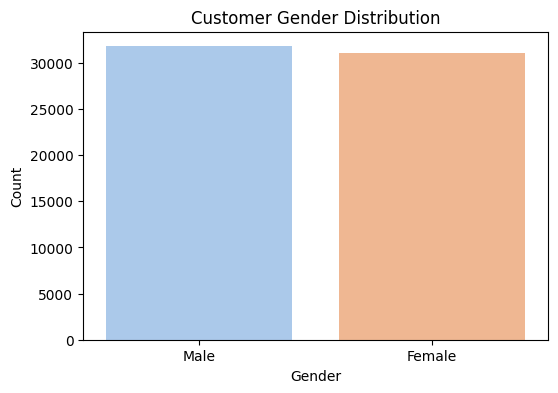

In [12]:
# ---1. Customer Demographics ---

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=sales_full, x='Gender', palette='pastel')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout
plt.show()

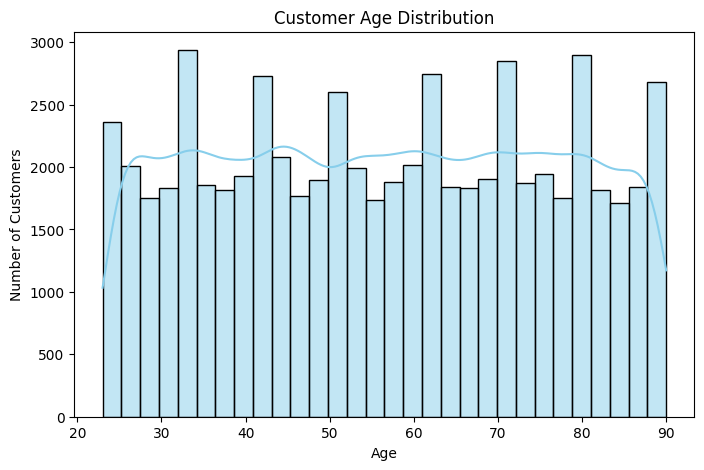

In [13]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sales_full['Age'], bins=30, kde=True, color='skyblue') # type: ignore
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout
plt.show()

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\3736065685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')


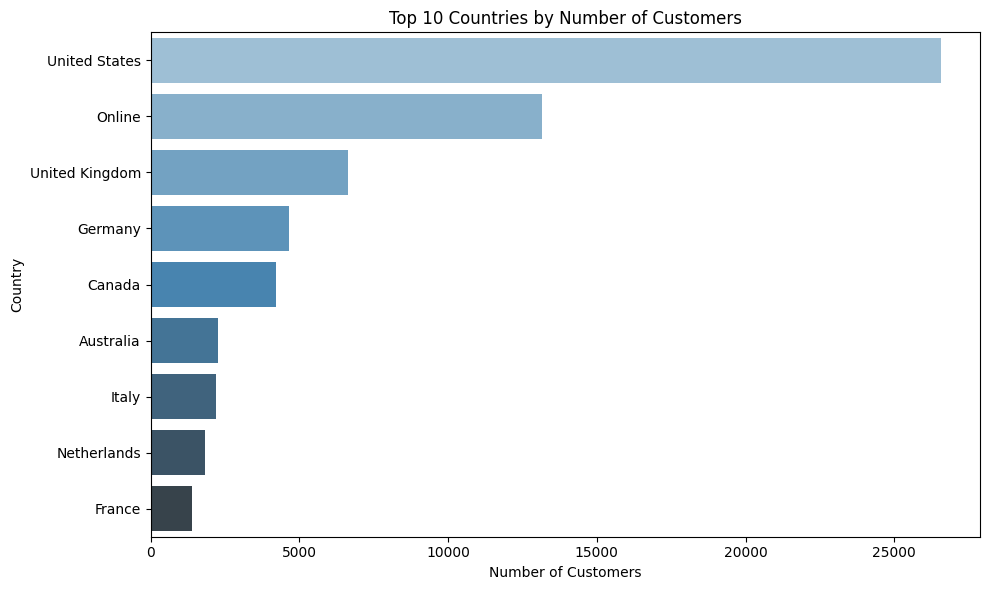

In [14]:
# Location by Country
plt.figure(figsize=(10,6))
top_countries = sales_full['Country_y'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')
plt.title("Top 10 Countries by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [15]:
# 2. ---Purchase Behaviour 

# Average order value
sales_full['Order Value'] = sales_full['Quantity'] * sales_full['Unit Price USD']
avg_order_value = sales_full.groupby('CustomerKey')['Order Value'].sum().mean()

# Frequency of purchases per customer
purchase_freq = sales_full['CustomerKey'].value_counts()

# Top products by count
top_products = sales_full['Product Name'].value_counts().head(10)
(avg_order_value, purchase_freq.describe(), top_products)

(np.float64(4690.458449566754),
 count    11887.000000
 mean         5.290149
 std          3.990147
 min          1.000000
 25%          2.000000
 50%          4.000000
 75%          7.000000
 max         36.000000
 Name: count, dtype: float64,
 Product Name
 Adventure Works Desktop PC2.30 MD230 Black    162
 Adventure Works Desktop PC2.30 MD230 White    158
 WWI Desktop PC1.80 E1800 White                158
 WWI Desktop PC1.60 E1600 Black                158
 WWI Desktop PC1.80 E1801 Black                157
 Adventure Works Desktop PC1.80 ED180 White    156
 WWI Desktop PC1.60 E1600 Silver               156
 WWI Desktop PC1.80 E1800 Silver               156
 Adventure Works Desktop PC1.60 ED160 Black    155
 WWI Desktop PC2.33 X2330 Black                154
 Name: count, dtype: int64)

**Interpretation**  
1. On average, each customer spend **$4690.46** accross all their orders.  
2. There are **11,887** unique customers.  
3. The average customer made **5.29** purchases.
4. The active customer bought **2-7** times, some most active bought **36** times.
5. The most frequently purchased product was **Adventure Works Desktop PC2.30 MD230 Black** **162 times**.

### **Sales Analysis**  
- Sales over time(monthly/quarterly trends)
- Top selling products and revenue generators
- Sales by store and region
- Sales by currency

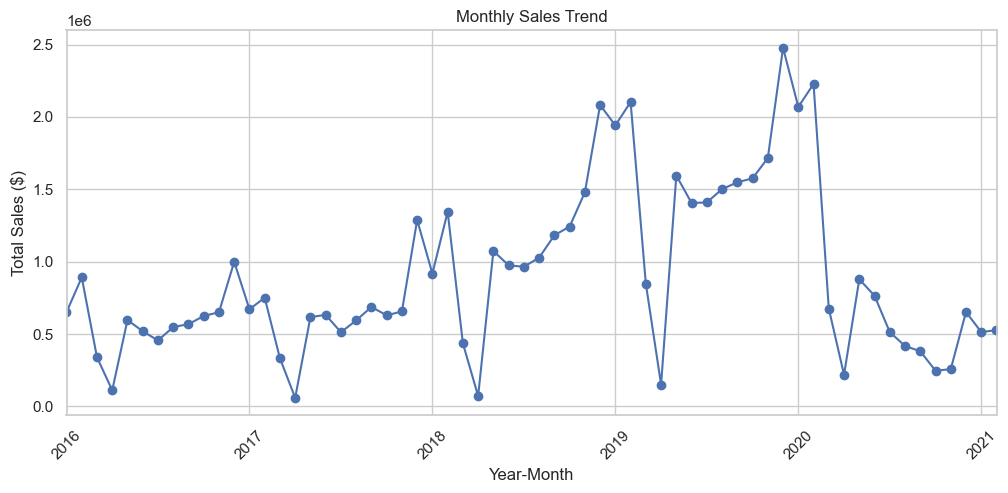

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\740938876.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='viridis')


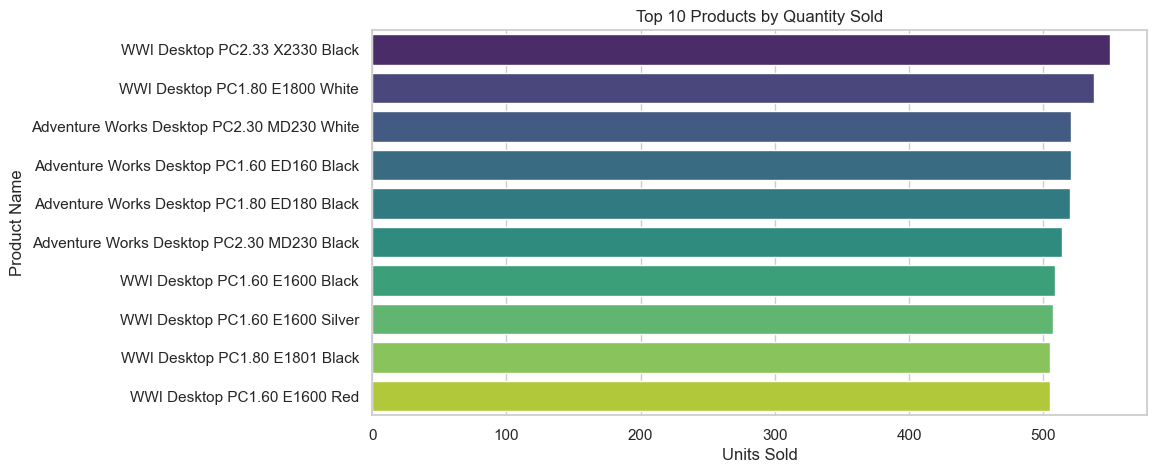

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\740938876.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='magma')


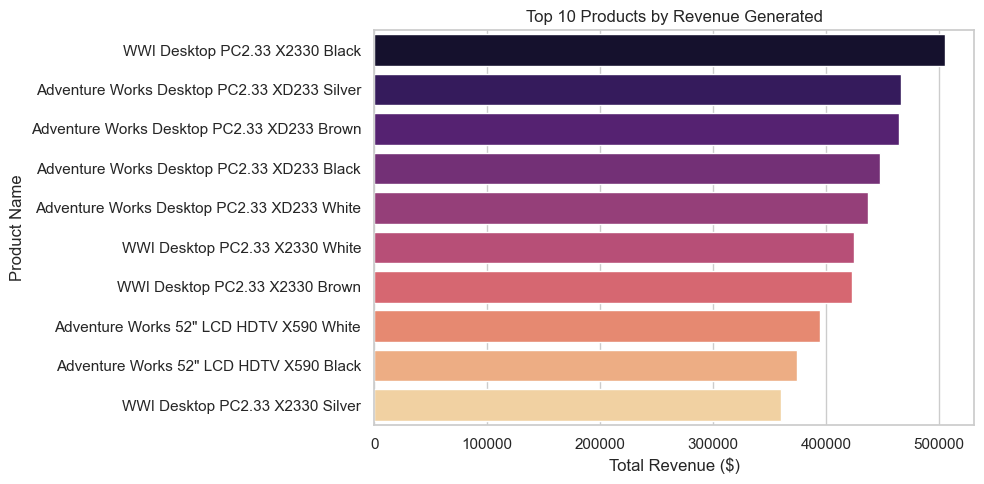

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\740938876.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rounded_sales, y=store_sales.index, palette='coolwarm')


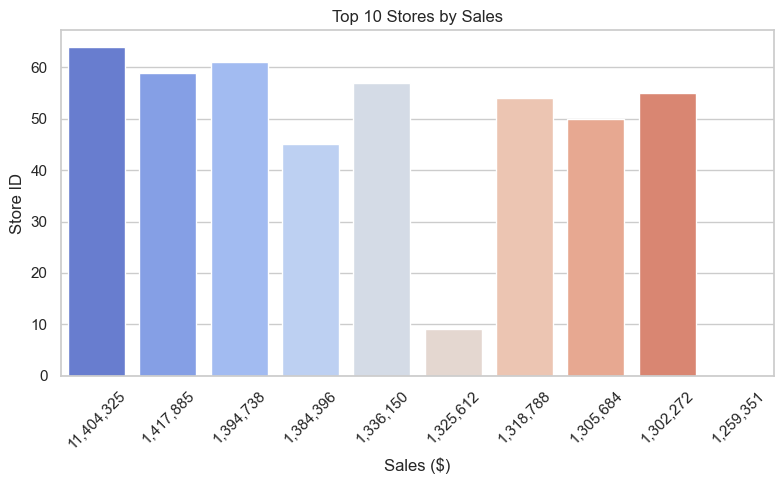

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\740938876.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues_d')


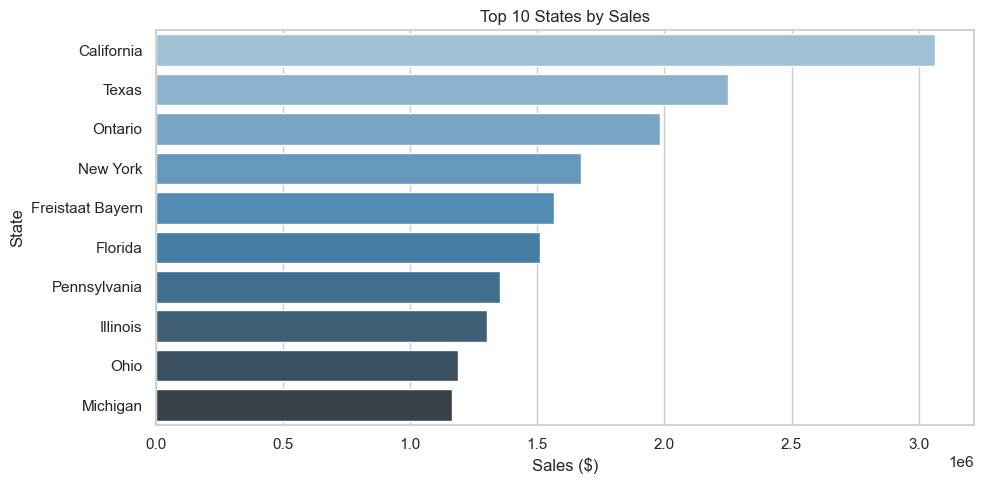

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\740938876.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=currency_sales.values, y=currency_sales.index, palette='Set2')


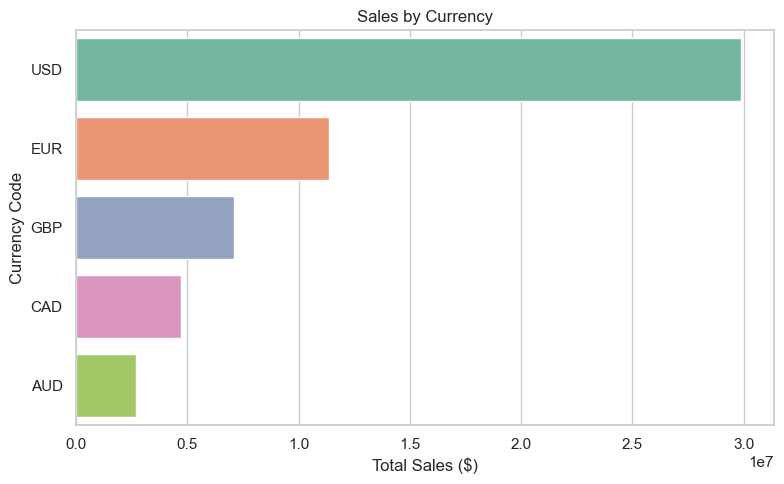

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set grid style
sns.set(style="whitegrid")

# Load cleaned data
eda_data_path = "../data/clean"
sales_full = pd.read_csv(os.path.join(eda_data_path, "sales_full.csv"))

# Convert Order Date to datetime 
sales_full['Order Date'] = pd.to_datetime(sales_full['Order Date'], errors='coerce')

# --- 1. Sales Over Time (Monthly/Quarterly Trend) ---

# Create Quater, Month, and Year columns
sales_full['YearMonth'] = sales_full['Order Date'].dt.to_period('M')
sales_full['Quarter'] = sales_full['Order Date'].dt.to_period('Q')

# Add Order Value column
sales_full['Order Value'] = sales_full['Quantity'] * sales_full['Unit Price USD']


# Total sales per month
monthly_sales = sales_full.groupby('YearMonth')['Order Value'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

# --- 2. Top Selling Products (by Quantity and Revenue) ---

top_products_quantity = sales_full.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_revenue = sales_full.groupby('Product Name')['Order Value'].sum().sort_values(ascending=False).head(10)

# Plot top products by quantity
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='viridis')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.tight_layout
plt.show()

# Plot top products by revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='magma')
plt.title("Top 10 Products by Revenue Generated")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# --- 3. Sales by Store and Region
store_sales = sales_full.groupby('StoreKey')['Order Value'].sum().sort_values(ascending=False).head(10)
state_sales = sales_full.groupby('State_x')['Order Value'].sum().sort_values(ascending=False).head(10)

# Round values
rounded_sales = np.round(store_sales.values, 0) # type: ignore

# Plot sales by top stores
plt.figure(figsize=(8, 5))
sns.barplot(x=rounded_sales, y=store_sales.index, palette='coolwarm')
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in rounded_sales], rotation=45) # type: ignore
plt.title("Top 10 Stores by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Store ID")
plt.tight_layout()
plt.show()

# Plot sales by top states
plt.figure(figsize=(10, 5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues_d')
plt.title("Top 10 States by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# --- 4. Sales by Currency ---
currency_sales = sales_full.groupby('Currency Code')['Order Value'].sum().sort_values(ascending=False)

# Plot sales by currency
plt.figure(figsize=(8, 5))
sns.barplot(x=currency_sales.values, y=currency_sales.index, palette='Set2')
plt.title("Sales by Currency")
plt.xlabel("Total Sales ($)")
plt.ylabel("Currency Code")
plt.tight_layout()
plt.show()

### **Product Analysis**  
- Most and least popular products
- Profitability (price vs cost)
- performance by category and subcategory

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\1055815197.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette='crest')


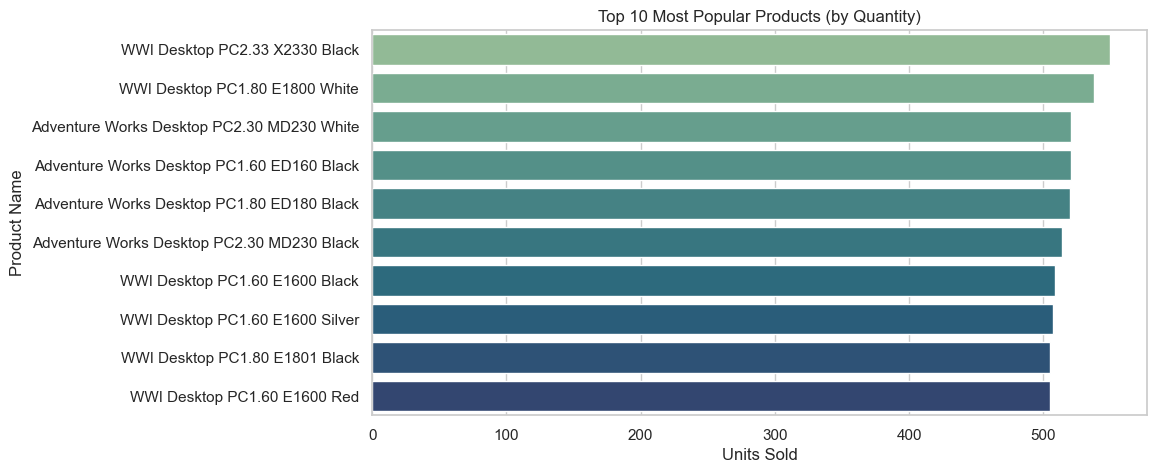

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\1055815197.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_popular_products.values, y=least_popular_products.index, palette='flare')


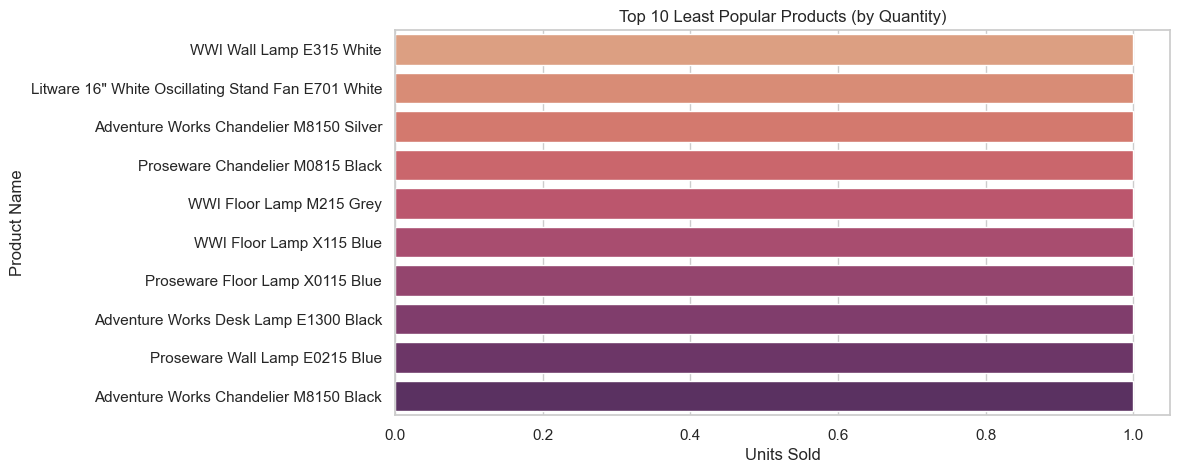

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\1055815197.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_profit.values, y=product_profit.index, palette='Spectral')


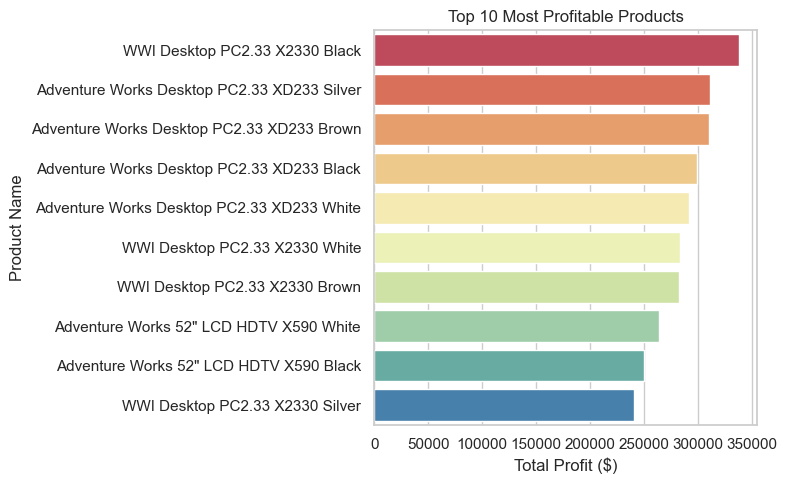

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\1055815197.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='Set3')


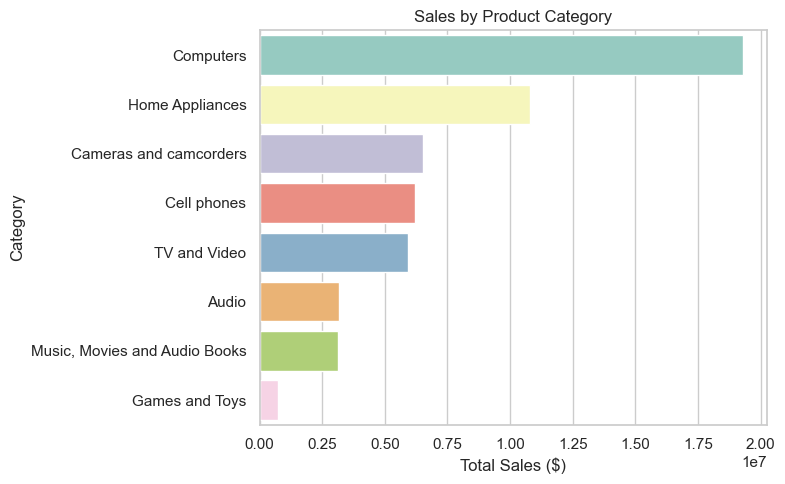

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\1055815197.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='Set2')


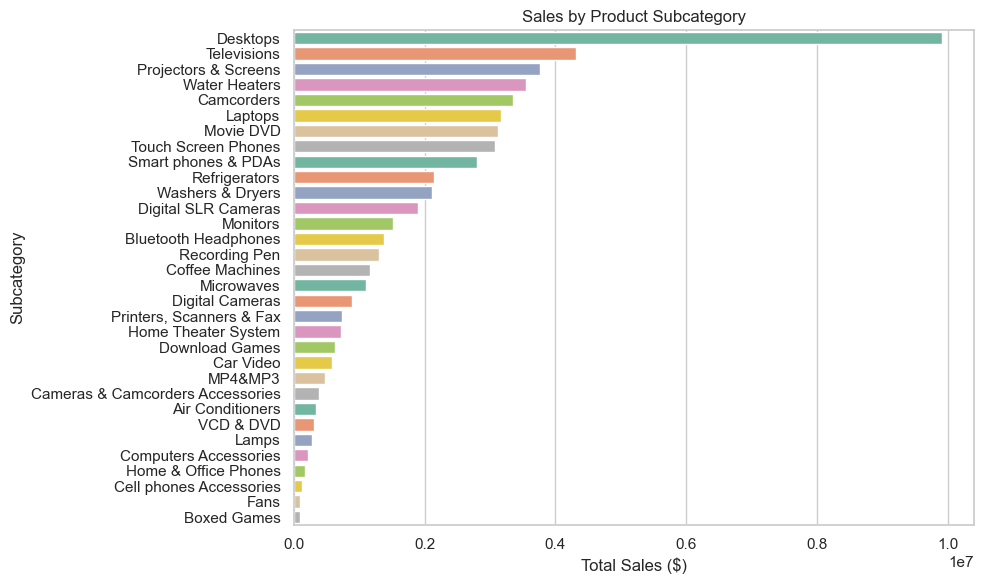

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set grid style
sns.set(style="whitegrid")

# Load cleaned data
eda_data_path = "../data/clean"
sales_full = pd.read_csv(os.path.join(eda_data_path, "sales_full.csv"))

# Ensure datetime columns are parsed
sales_full['Order Date'] = pd.to_datetime(sales_full['Order Date'], errors='coerce')
sales_full['Open Date'] = pd.to_datetime(sales_full['Open Date'], errors='coerce')

# Calculate derived metrics
sales_full['Order Value'] = sales_full['Quantity'] * sales_full['Unit Price USD']
sales_full['Profit'] = (sales_full['Unit Price USD'] - sales_full['Unit Cost USD']) *sales_full['Quantity']
sales_full['Store Age'] = pd.to_datetime('today').year - sales_full['Open Date'].dt.year

# Most popular product (by quantity)
popular_products = sales_full.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Least popular products (by quantity)
least_popular_products = sales_full.groupby('Product Name')['Quantity'].sum().sort_values(ascending=True).head(10)

# Product profitability
product_profit = sales_full.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Category Performance
category_sales = sales_full.groupby('Category')['Order Value'].sum().sort_values(ascending=False)
subcategory_sales = sales_full.groupby('Subcategory')['Order Value'].sum().sort_values(ascending=False)

# Plots
plt.figure(figsize=(10, 5))
sns.barplot(x=popular_products.values, y=popular_products.index, palette='crest')
plt.title("Top 10 Most Popular Products (by Quantity)")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.tight_layout
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=least_popular_products.values, y=least_popular_products.index, palette='flare')
plt.title("Top 10 Least Popular Products (by Quantity)")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.tight_layout
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=product_profit.values, y=product_profit.index, palette='Spectral')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='Set3')
plt.title("Sales by Product Category")
plt.xlabel("Total Sales ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='Set2')
plt.title("Sales by Product Subcategory")
plt.xlabel("Total Sales ($)")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


### **Store Analysis**  
- Sales by store size, age, and geography
- Open date vs. performance

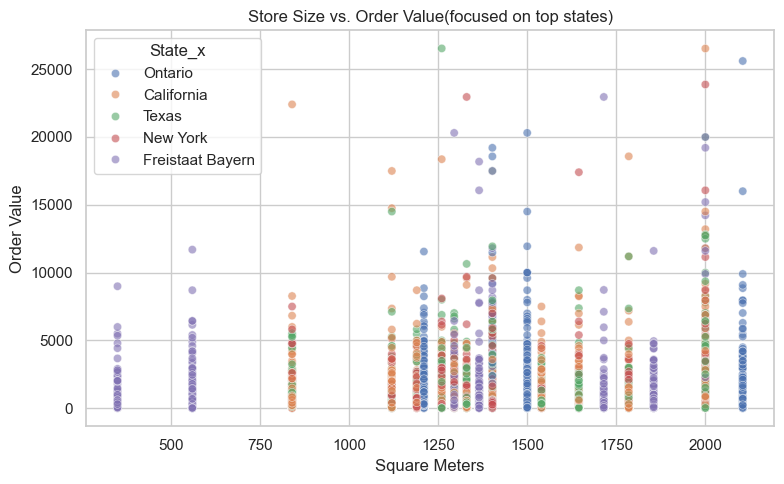

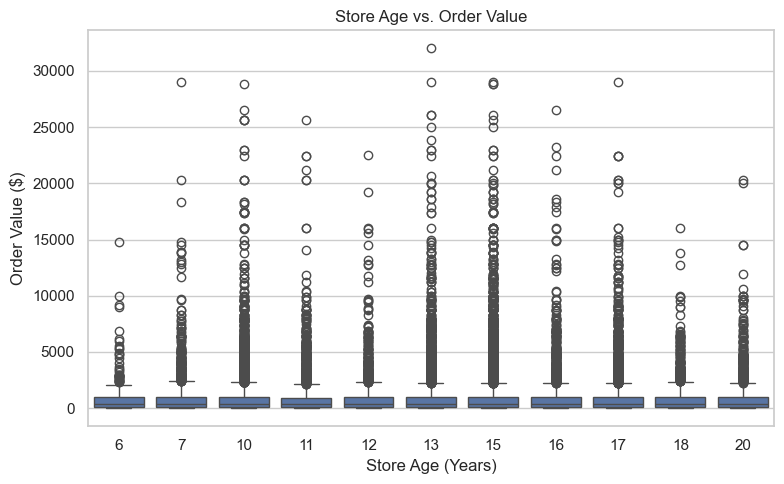

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\3957547989.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_sales.values, y=geo_sales.index, palette='cool')


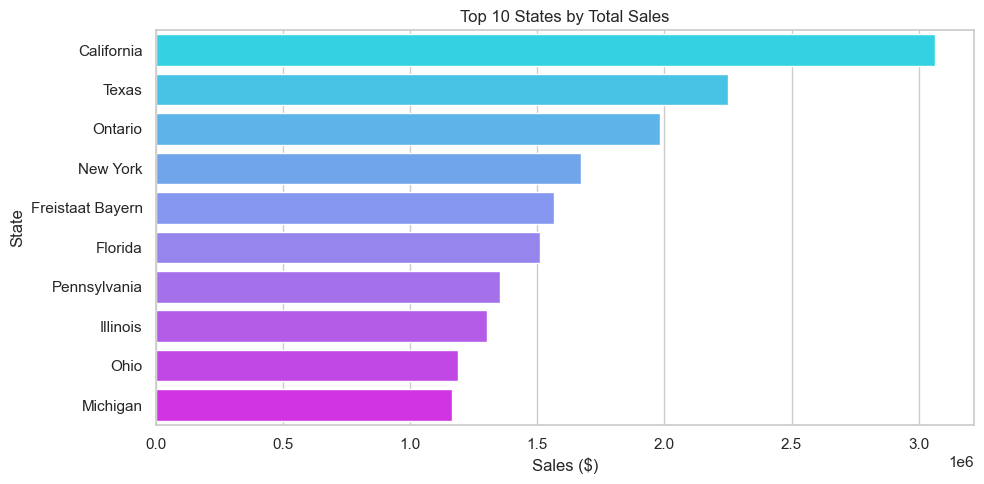

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set grid style
sns.set(style="whitegrid")

# Load cleaned data
eda_data_path = "../data/clean"
sales_full = pd.read_csv(os.path.join(eda_data_path, "sales_full.csv"))

# Ensure datetime columns are parsed
sales_full['Order Date'] = pd.to_datetime(sales_full['Order Date'], errors='coerce')
sales_full['Open Date'] = pd.to_datetime(sales_full['Open Date'], errors='coerce')

# Calculate derived metrics
sales_full['Order Value'] = sales_full['Quantity'] * sales_full['Unit Price USD']
sales_full['Profit'] = (sales_full['Unit Price USD'] - sales_full['Unit Cost USD']) *sales_full['Quantity']
sales_full['Store Age'] = pd.to_datetime('today').year - sales_full['Open Date'].dt.year
top_states = sales_full['State_x'].value_counts().head(5).index
filtered = sales_full[sales_full['State_x'].isin(top_states)]

# Sales by store size
plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered, x='Square Meters', y='Order Value', hue='State_x', alpha=0.6)
plt.title("Store Size vs. Order Value(focused on top states)")
plt.xlabel("Square Meters")
plt.ylabel("Order Value")
plt.tight_layout()
plt.show()

# Sales by store age
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_full, x='Store Age', y='Order Value')
plt.title("Store Age vs. Order Value")
plt.xlabel("Store Age (Years)")
plt.ylabel("Order Value ($)")
plt.tight_layout()
plt.show()

# Sales by geography
geo_sales = sales_full.groupby('State_x')['Order Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=geo_sales.values, y=geo_sales.index, palette='cool')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### **Skewness of common numeric columns**

📊 Skewness of key numerical columns:
Order Value       6.038293
Unit Price USD    3.562428
Unit Cost USD     2.898091
Quantity          1.114979
dtype: float64


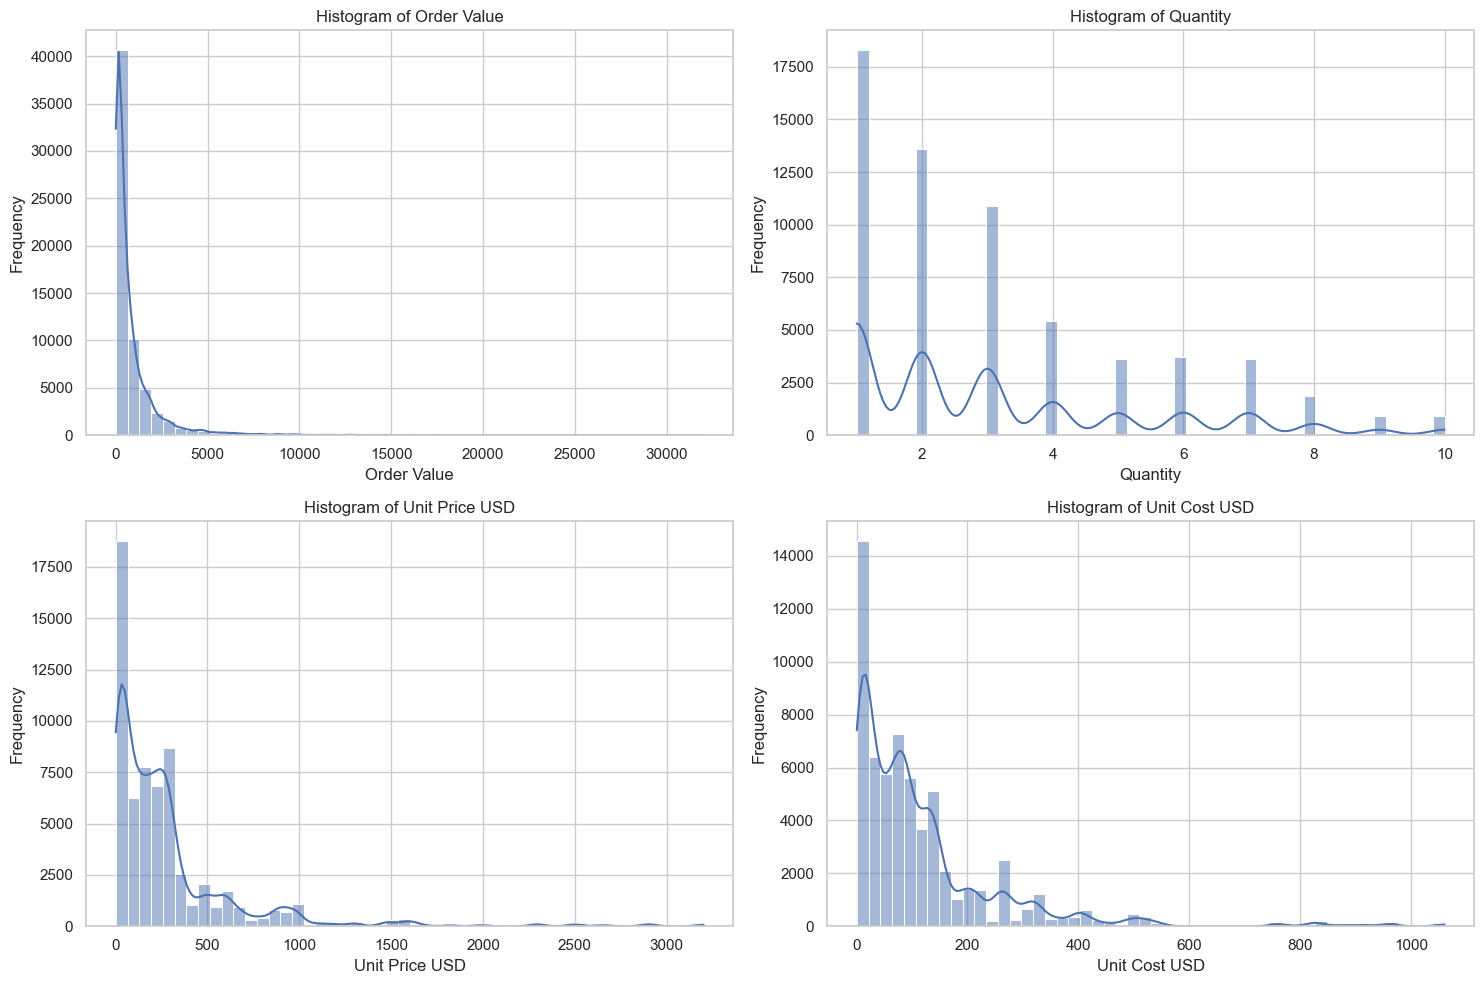

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
numeric_cols=['Order Value', 'Quantity', 'Unit Price USD', 'Unit Cost USD']

# Calculate skewness
skewness = sales_full[numeric_cols].skew().sort_values(ascending=False)

#Display results
print("📊 Skewness of key numerical columns:")
print(skewness)

# Plot skewness
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(sales_full[col], kde=True, bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretation:**  
All four distributions are right-skewed(long tail on the right).
- A large concentraion of values near Zero especially for:  
    - Order Value  
    - Unit Price USD  
    - Unit Cost UUD  
- Quantity appears discrete with stong peaks at small whole numbers (e.g. 1,2,3)

### **Detect Outliers**

Number of outlier transactions: 5729


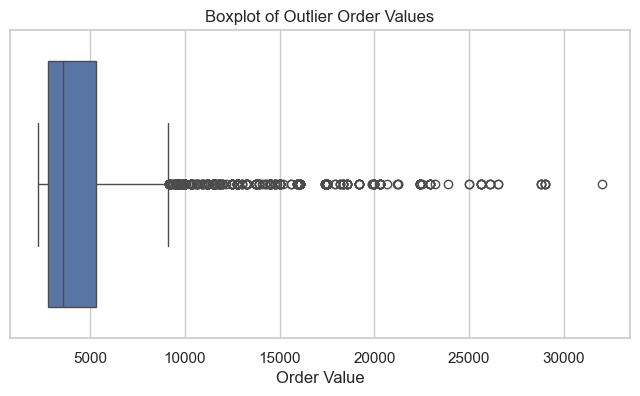

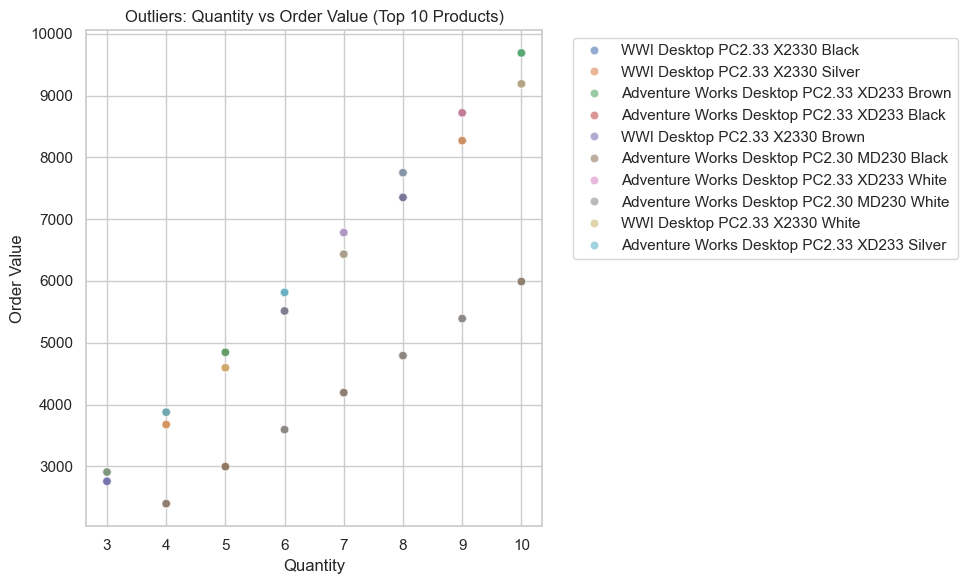

C:\Users\VivekKumarDuggal\AppData\Local\Temp\ipykernel_6148\573946564.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlier_products.values, y=top_outlier_products.index, palette='flare')


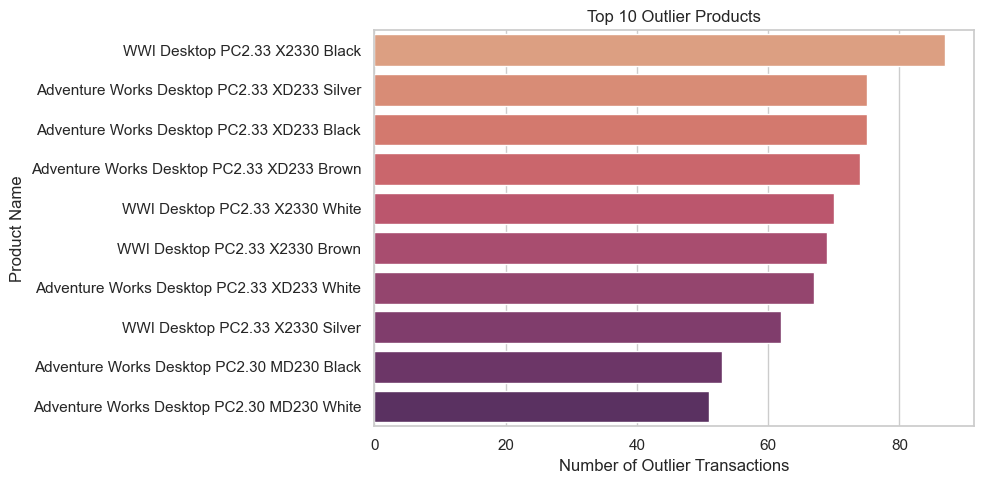

Outliers detected: 5940


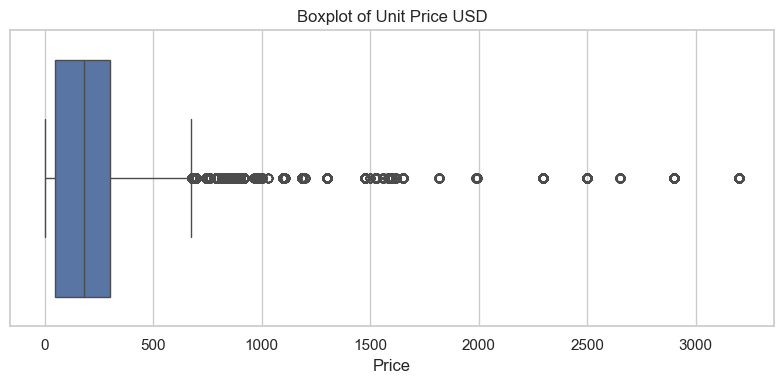

In [43]:
# Detect ouliers in Order Value
Q1 = sales_full['Order Value'].quantile(.25)
Q3 = sales_full['Order Value'].quantile(.75)
IQR = Q3-Q1

outliers = sales_full[
    (sales_full['Order Value'] < Q1 - 1.5 * IQR) | (sales_full['Order Value'] > Q3 + 1.5 * IQR)
]
print(f"Number of outlier transactions: {len(outliers)}")
outliers[['Order Value', 'Quantity', 'Product Name']].head()

# Plot 1: Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=outliers['Order Value'])
plt.title("Boxplot of Outlier Order Values")
plt.xlabel("Order Value")
plt.tight_layout
plt.show()

# Plot 2: Scatter plot
top_products = outliers['Product Name'].value_counts().head(10).index
filtered_outliers = outliers[outliers['Product Name'].isin(top_products)]
#---Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_outliers, x='Quantity', y='Order Value', hue='Product Name', alpha=0.6)
plt.title("Outliers: Quantity vs Order Value (Top 10 Products)")
plt.xlabel("Quantity")
plt.ylabel("Order Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3: Top 10 outlier products
top_outlier_products = outliers['Product Name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_outlier_products.values, y=top_outlier_products.index, palette='flare')
plt.title("Top 10 Outlier Products")
plt.xlabel("Number of Outlier Transactions")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Detect Outliers in Unit Price USD
# Unusually High or Low Prices indicate: data entry errors, premium-prices products, pricing strategy gaps

# Calculate IQR and thresholds
Q1 = sales_full['Unit Price USD'].quantile(.25)
Q3 = sales_full['Unit Price USD'].quantile(.75)
IQR = Q3-Q1

price_outliers = sales_full[
    (sales_full['Unit Price USD'] < Q1 - 1.5 * IQR) |
    (sales_full['Unit Price USD'] > Q3 + 1.5 * IQR)
]
print(f"Outliers detected: {len(price_outliers)}")
price_outliers[['Product Name', 'Unit Price USD', 'Unit Cost USD']].sort_values(by='Unit Price USD', ascending=False).head()

# Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=sales_full['Unit Price USD'])
plt.title("Boxplot of Unit Price USD")
plt.xlabel("Price")
plt.tight_layout()
plt.show()